<a href="https://colab.research.google.com/github/jayeshraj619/AI-LAB/blob/master/ebin_jay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('/content/Book1.csv')
df

,date,SPI1,sl1,avg R.HUM,an.temp,a.solar
0,01-01-1980,-1.714817,0.889794,0.632411,-2.147330,4.515143
1,01-02-1980,-1.469306,-1.714817,0.680302,-3.151907,0.925778
2,01-03-1980,-1.469306,-1.469306,0.749740,-1.640669,-1.818487
3,01-04-1980,-1.469306,-1.469306,0.856281,0.078177,-0.988543
4,01-05-1980,-1.469306,-1.469306,0.942733,2.525315,5.825042
...,...,...,...,...,...,...
408,01-01-2014,0.317544,0.143235,0.783198,-1.859363,1.881506
409,01-02-2014,0.546507,0.317544,0.946414,1.889010,-0.766231
410,01-03-2014,0.629004,0.546507,0.959161,2.218363,0.234905
411,01-04-2014,0.174373,0.629004,0.892296,1.309410,-1.471623


In [69]:
 df['date_time'] = pd.to_datetime(df['date'], infer_datetime_format=True)


In [70]:
 df.index = pd.to_datetime(df['date_time'], format='%d.%m.%Y')
 df = df.drop(columns = ['date','date_time'])
 df

,SPI1,sl1,avg R.HUM,an.temp,a.solar
date_time,,,,,
1980-01-01,-1.714817,0.889794,0.632411,-2.147330,4.515143
1980-01-02,-1.469306,-1.714817,0.680302,-3.151907,0.925778
1980-01-03,-1.469306,-1.469306,0.749740,-1.640669,-1.818487
1980-01-04,-1.469306,-1.469306,0.856281,0.078177,-0.988543
1980-01-05,-1.469306,-1.469306,0.942733,2.525315,5.825042
...,...,...,...,...,...
2014-01-01,0.317544,0.143235,0.783198,-1.859363,1.881506
2014-01-02,0.546507,0.317544,0.946414,1.889010,-0.766231
2014-01-03,0.629004,0.546507,0.959161,2.218363,0.234905


In [74]:
temp_df = pd.DataFrame({'SPI1':temp})
temp_df
#temp_df.plot()

,SPI1
date_time,
1980-01-01,-1.714817
1980-01-02,-1.469306
1980-01-03,-1.469306
1980-01-04,-1.469306
1980-01-05,-1.469306
...,...
2014-01-01,0.317544
2014-01-02,0.546507
2014-01-03,0.629004


In [75]:
def df_to_X_y2(df, window_size=6):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [77]:
X, y = df_to_X_y2(df)
X.shape, y.shape

((407, 6, 5), (407,))

In [78]:
X_train, y_train = X[:300], y[:300]
X_val, y_val = X[300:330], y[300:330]
X_test, y_test = X[330:], y[330:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((300, 6, 5), (300,), (30, 6, 5), (30,), (77, 6, 5), (77,))

In [112]:
temp_training_mean = np.mean(X_train[:, :, 0])
temp_training_std = np.std(X_train[:, :, 0])

                           
def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 1])
temp_training_std = np.std(X_train[:, :, 1])

                           
def preprocess(X):
  X[:, :, 1] = (X[:, :, 1] - temp_training_mean) / temp_training_std
  return X


temp_training_mean = np.mean(X_train[:, :, 2])
temp_training_std = np.std(X_train[:, :, 2])

                           
def preprocess(X):
  X[:, :, 2] = (X[:, :, 2] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X

temp_training_mean = np.mean(X_train[:, :, 3])
temp_training_std = np.std(X_train[:, :, 3])

                           
def preprocess(X):
  X[:, :, 3] = (X[:, :, 3] - temp_training_mean) / temp_training_std
  return X  
temp_training_mean = np.mean(X_train[:, :, 4])
temp_training_std = np.std(X_train[:, :, 4])

                           
def preprocess(X):
  X[:, :, 4] = (X[:, :, 4] - temp_training_mean) / temp_training_std
  return X  

In [ ]:
preprocess(X_train)
preprocess(X_val)
preprocess(X_test)

In [122]:
p_training_mean3 = np.mean(X_train[:, :, 0])
p_training_std3 = np.std(X_train[:, :, 0])

def preprocess_output3(y):
  y[:] = (y[:] - p_training_mean3) / p_training_std3
  return y

In [123]:
preprocess_output3(y_train)
preprocess_output3(y_val)
preprocess_output3(y_test)

array([ 2.15697321, -0.62900372, -0.24532919, -0.10428457, -0.24532919,
       -0.21578265, -1.70155793, -0.44224165, -0.52243608, -0.2894859 ,
       -1.1271452 , -1.70155793,  0.90922065,  0.10428457,  0.17437274,
       -0.24532919, -0.17437274, -1.00140985, -0.36479832, -1.4545789 ,
        0.21578265, -0.36479832,  0.14323475, -0.78829543, -0.46757493,
       -0.03470558, -0.46757493, -0.17437274, -0.8088444 , -1.1271452 ,
       -0.14323475, -1.70155793, -0.14323475, -0.44224165, -1.00140985,
        1.00140985,  0.71602545,  1.28979827,  1.71481725,  0.46757493,
        1.28979827,  1.27380231, -0.88979437, -0.2894859 , -2.14577843,
       -1.00140985, -1.4545789 , -1.1271452 ,  0.39145685,  2.15697321,
        0.31754439,  0.62900372, -0.46757493,  1.1271452 , -1.1271452 ,
        1.27380231, -1.70155793, -0.78829543, -0.69433599,  0.52243608,
       -0.17437274,  0.17437274, -0.03470558,  1.46930632,  1.71481725,
       -1.4545789 ,  0.78829543, -0.69433599, -0.606144  , -2.14

In [124]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model4 = Sequential()
model4.add(InputLayer((6, 5)))
model4.add(LSTM(64))
model4.add(Dense(8, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                17920     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [125]:
cp4 = ModelCheckpoint('model4/', save_best_only=True)
model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [126]:
model4.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp4])

Epoch 1/10
 1/10 [==>...........................] - ETA: 15s - loss: 1.0140 - root_mean_squared_error: 1.0070

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 7s 534ms/step - loss: 0.9733 - root_mean_squared_error: 0.9865 - val_loss: 0.8301 - val_root_mean_squared_error: 0.9111
Epoch 2/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.7728 - root_mean_squared_error: 0.8791

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 4s 468ms/step - loss: 0.9549 - root_mean_squared_error: 0.9772 - val_loss: 0.8256 - val_root_mean_squared_error: 0.9086
Epoch 3/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.9357 - root_mean_squared_error: 0.9673

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 5s 500ms/step - loss: 0.9404 - root_mean_squared_error: 0.9697 - val_loss: 0.8220 - val_root_mean_squared_error: 0.9067
Epoch 4/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.6748 - root_mean_squared_error: 0.8215

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 4s 457ms/step - loss: 0.9267 - root_mean_squared_error: 0.9627 - val_loss: 0.8200 - val_root_mean_squared_error: 0.9055
Epoch 5/10
 1/10 [==>...........................] - ETA: 0s - loss: 1.0983 - root_mean_squared_error: 1.0480

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 5s 603ms/step - loss: 0.9146 - root_mean_squared_error: 0.9563 - val_loss: 0.8186 - val_root_mean_squared_error: 0.9047
Epoch 6/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.6448 - root_mean_squared_error: 0.8030

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 4s 451ms/step - loss: 0.9040 - root_mean_squared_error: 0.9508 - val_loss: 0.8175 - val_root_mean_squared_error: 0.9042
Epoch 7/10
 1/10 [==>...........................] - ETA: 0s - loss: 1.1824 - root_mean_squared_error: 1.0874

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 4s 496ms/step - loss: 0.8945 - root_mean_squared_error: 0.9458 - val_loss: 0.8173 - val_root_mean_squared_error: 0.9041
Epoch 8/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.9033 - root_mean_squared_error: 0.9504

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 4s 444ms/step - loss: 0.8852 - root_mean_squared_error: 0.9408 - val_loss: 0.8168 - val_root_mean_squared_error: 0.9038
Epoch 9/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.9160 - root_mean_squared_error: 0.9571

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 6s 649ms/step - loss: 0.8786 - root_mean_squared_error: 0.9373 - val_loss: 0.8167 - val_root_mean_squared_error: 0.9037
Epoch 10/10
 1/10 [==>...........................] - ETA: 0s - loss: 0.8060 - root_mean_squared_error: 0.8978

INFO:tensorflow:Assets written to: model4/assets


INFO:tensorflow:Assets written to: model4/assets


10/10 [==============================] - 4s 426ms/step - loss: 0.8734 - root_mean_squared_error: 0.9345 - val_loss: 0.8160 - val_root_mean_squared_error: 0.9033


In [134]:
def postprocess_temp(arr):
  arr = (arr*temp_training_std) + temp_training_mean
  return arr

In [137]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  temp_preds = postprocess_temp(predictions[: ])
  temp_actuals =postprocess_temp(y[:])
  df = pd.DataFrame(data={'Temperature Predictions': temp_preds,
                          'Temperature Actuals':temp_actuals,
                          })
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  
  return df[start:end]

In [138]:
post_processed_df = plot_predictions2(model4, X_test, y_test)
post_processed_df

ValueError: ignored

In [127]:
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
def plot_predictions1(model, X, y, start=0, end=100):
  predictions = model.predict(X).flatten()
  df = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(y, predictions)

(    Predictions   Actuals
 0     -0.043547  2.156973
 1     -0.025260 -0.629004
 2     -0.091753 -0.245329
 3     -0.038434 -0.104285
 4     -0.069689 -0.245329
 ..          ...       ...
 72    -0.103344  0.317544
 73    -0.021211  0.546507
 74     0.017410  0.629004
 75     0.002884  0.174373
 76     0.003616  1.144318
 
 [77 rows x 2 columns], 0.9581282295916411)

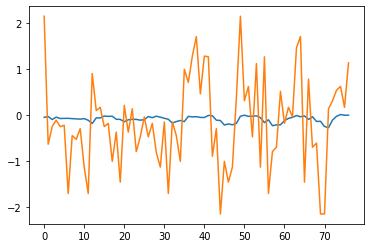

In [128]:
plot_predictions1(model4, X_test, y_test)